# Adatok beolvasása

In [2]:
import pandas as pd

url = "http://qta.tk.mta.hu/uploads/files/napimigrans_corpus.csv"
corpus_df = pd.read_csv(url, sep="\t", header=None, encoding = "utf-8")
corpus_df.columns = ["url", "text"] # Változók átnevezése
corpus_df.head(10)

,url,text
0,http://napimigrans.com/egykori-szexrabszolgakb...,"2016-02-11 Több száz, egykor az ISIS fogságába..."
1,http://napimigrans.com/egy-muszlim-rab-megprob...,2016-02-12 Washington – A 25 éves muszlim fogv...
2,http://napimigrans.com/magyarorszag-fele-szori...,2016-02-21 Horvátország nem engedi tovább a Sz...
3,http://napimigrans.com/vajon-mikor-hal-meg-az-...,"2016-02-24 A népvándorlás nem más, mint egy ol..."
4,http://napimigrans.com/a-parizsi-gyilkosok-sem...,2016-02-16 MILOS ZEMAN A KORÁNRA HIVATKOZIK – ...
5,http://napimigrans.com/verfurdot-rendezett-az-...,2016-02-09 Több mint 300 embert végeztek ki az...
6,http://napimigrans.com/video-oriasi-tuntetes-a...,2016-02-21 Minnesota – Úgy látszik az USA-ban ...
7,http://napimigrans.com/video-220-milliot-kolte...,"2016-02-24 Még 2014-ben szó volt róla, hogy né..."
8,http://napimigrans.com/hogyan-romboljuk-le-a-h...,2016-02-21 Az értékek viszonylagosak. Más kult...
9,http://napimigrans.com/europa-megeroszakolasa-...,2016-02-18 Meghökkentő címlappal jelent meg a ...


# Tokenizáló és szótövező függvény létrehozása

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import unicodedata

stemmer = SnowballStemmer("hungarian")
nltk.download("stopwords")
nltk.download('punkt')

# Function to remove punctuation from string
def strip_punctuation(text):
    punctutation_cats = set(['Pc', 'Pd', 'Ps', 'Pe', 'Pi', 'Pf', 'Po'])
    return ''.join(x for x in text
                   if unicodedata.category(x) not in punctutation_cats)

# Function to tokenize descriptions
def tokenize_article(text):
    text = text.lower() # to lowercase
    text = strip_punctuation(text) # Strip punctuation
    tokenized_text = word_tokenize(text) # Tokenize the text
    tokenized_text = [word for word in tokenized_text 
                      if word not in stopwords.words('hungarian')] # Remove stopwords
    tokenized_text = map(stemmer.stem,tokenized_text) # Stemming
    return tokenized_text

print " ".join(tokenize_article(corpus_df["text"][0]))
print corpus_df["text"][0]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kubik_000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kubik_000\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
20160211 száz egy isis fogság szexrabszolg szenvedő nő csatlakozot ir egység nap hölgy nevez cél tűzte kiirts írmag őket brutális megkínzó élet eset ör tönkretevő terrorszervezet egység jelenleg körülbel 2000 nő szolgál ők min ember sikeres elszökt terrorista tábor borzalmas kínzás élt mindennap többször megerőszakolta őket mindez vég nézze család szerett kiirtott milíc 2014ben ere tel falv rohan le szemrevalóbb nők lány kivétel minden lemészárol bosszú reményétől vezetv tervez résztvesz mosz ellen offenzív iszla áll nevező szervez ir központ ahonn egység legtöbb tag elszököt milicista id adta őket khat khider parancsn szolgál egység nyilatkozt médiainterjú sor háború dúl

# Dokumentum-kifejezés mátrix létrehozása

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer = tokenize_article)
document_term_matrix = vectorizer.fit_transform(corpus_df["text"])

# TF-IDF súlyozás

In [6]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(document_term_matrix)

Az első szöveg 10 legnagyobb TF-IDF súllyal rendelkező szava

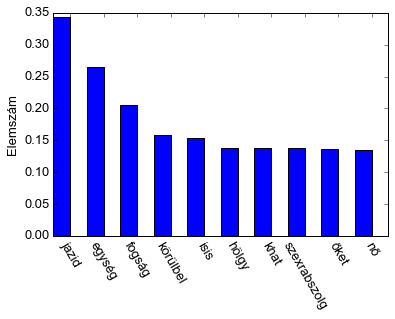

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_names = vectorizer.get_feature_names()
tfidf_weights = tfidf_matrix.todense()[0,].tolist()[0]
names_and_weights = zip(feature_names, tfidf_weights)
names_and_weights = sorted(names_and_weights, key=lambda tup: tup[1], reverse=True)
words_and_weights = []
for item in names_and_weights[:10]:
    words_and_weights.append((item[0], item[1])) 
#print [item for item in names_and_weights if item[1]>0.0]

from __future__ import unicode_literals

plt.rc('font', family='Arial', size=13)

ind = np.arange(len(words_and_weights))  # the x locations for the groups
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, map(lambda x: x[1], words_and_weights),
                width, color='b')

#womenMeans = dominant_topics
#rects2 = ax.bar(ind + width, topic_memberships, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel(u'Elemszám')
ax.set_xticks(ind + width)
ax.set_xticklabels(map(lambda x: x[0], words_and_weights),
                  rotation=-60)

plt.show()

# Koszinusz hasonlóságok meghatározása

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim_matrix = cosine_similarity(tfidf_matrix)
cos_sim_matrix

array([[ 1.        ,  0.03714459,  0.00683204, ...,  0.01371461,
         0.0283652 ,  0.01333446],
       [ 0.03714459,  1.        ,  0.01294815, ...,  0.        ,
         0.01837278,  0.00362946],
       [ 0.00683204,  0.01294815,  1.        , ...,  0.00786881,
         0.01534209,  0.02308356],
       ..., 
       [ 0.01371461,  0.        ,  0.00786881, ...,  1.        ,
         0.00699566,  0.        ],
       [ 0.0283652 ,  0.01837278,  0.01534209, ...,  0.00699566,
         1.        ,  0.02411675],
       [ 0.01333446,  0.00362946,  0.02308356, ...,  0.        ,
         0.02411675,  1.        ]])

Az korpusz első szövegéhez leginkább hasonló szöveg megtalálása

In [8]:
import numpy as np
print np.argmax(cos_sim_matrix[0,1:])
print cos_sim_matrix[0,1:][50]
print corpus_df["text"][51]

50
0.110201571422
2016-02-12 Néhány élelmiszer ára rendkívüli módon megemelkedett az utóbbi hetekben Deir Ez-Zour több, az Iszlám Állam által körbezárt és ostrom alatt tartott kerületének piacain. Ugyanakkor itt legalább van élelmiszer, nem úgy, mint az ISIS illetve a „mérsékelt” ellenzék által uralt területeken – például Madayában – ahol a terrorcsoportok szabályosan éheztetik a lakosságot. Elöljáróban annyit mindenképpen fontos tudni, hogy míg négy évvel ezelőtt 1 szír font 4 forintot ért, addig ma 1 forint már körülbelül 1,5 szír fontba kerül – ez a hiperinfláció a háború „természetes” velejárója, sajnos… Az átlagkereset Szíriában az elmúlt négy év során körülbelül 20-30%-kal növekedett, az élelmiszerárak viszont ennek többszörösével. Az átlagkereset jelenleg havi 25 ezer szír font. Ez napjainkban körülbelül 60 euró, 2011-ben ugyanez 350 eurót ért. A következő élelmiszerárakat ennek fényében nézzük meg: A magát Iszlám Államnak nevező terrorszervezet ellenőrzi Raqqa tartomány teljes 

# K-közép klaszterezés

In [13]:
from sklearn.cluster import KMeans

num_clusters=5
km = KMeans(n_clusters=num_clusters,
           random_state=1)
km.fit(tfidf_matrix)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [24]:
memberships = list(km.labels_)
corpus_df["cluster_membership"] = memberships
corpus_df.head(10)

,url,text,cluster_membership,dominant_topics
0,http://napimigrans.com/egykori-szexrabszolgakb...,"2016-02-11 Több száz, egykor az ISIS fogságába...",3,3
1,http://napimigrans.com/egy-muszlim-rab-megprob...,2016-02-12 Washington – A 25 éves muszlim fogv...,3,3
2,http://napimigrans.com/magyarorszag-fele-szori...,2016-02-21 Horvátország nem engedi tovább a Sz...,0,0
3,http://napimigrans.com/vajon-mikor-hal-meg-az-...,"2016-02-24 A népvándorlás nem más, mint egy ol...",0,0
4,http://napimigrans.com/a-parizsi-gyilkosok-sem...,2016-02-16 MILOS ZEMAN A KORÁNRA HIVATKOZIK – ...,0,0
5,http://napimigrans.com/verfurdot-rendezett-az-...,2016-02-09 Több mint 300 embert végeztek ki az...,1,3
6,http://napimigrans.com/video-oriasi-tuntetes-a...,2016-02-21 Minnesota – Úgy látszik az USA-ban ...,4,3
7,http://napimigrans.com/video-220-milliot-kolte...,"2016-02-24 Még 2014-ben szó volt róla, hogy né...",1,3
8,http://napimigrans.com/hogyan-romboljuk-le-a-h...,2016-02-21 Az értékek viszonylagosak. Más kult...,3,2
9,http://napimigrans.com/europa-megeroszakolasa-...,2016-02-18 Meghökkentő címlappal jelent meg a ...,4,3


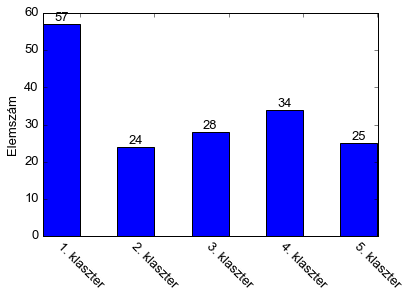

In [26]:
from operator import itemgetter
import collections

N = 5
counter=collections.Counter(memberships)
cluster_memberships=[item[1] for item in
                     sorted(counter.items(), key=itemgetter(0))]

counter=collections.Counter(dominant_topics)
topic_memberships=[item[1] for item in
                   sorted(counter.items(), key=itemgetter(0))]

ind = np.arange(N)  # the x locations for the groups
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, cluster_memberships, width, color='b')

#womenMeans = dominant_topics
#rects2 = ax.bar(ind + width, topic_memberships, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel(u'Elemszám')
ax.set_xticks(ind + width)
ax.set_xticklabels(('1. klaszter', 
                    '2. klaszter', 
                    '3. klaszter', 
                    '4. klaszter', 
                    '5. klaszter'),
                  rotation=-45)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

In [17]:
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(0,num_clusters):
    print "%s. klaszter" % (i+1)
    term_list = []
    for ind in order_centroids[i,:30]:
        term_list.append(terms[ind])
    print ", ".join(term_list)+"\n"

1. klaszter
európ, határ, is, ország, migráns, szerb, merkel, bevándorló, görög, macedón, ha, menekült, kancellár, ném, németország, iszla, görögország, unió, nat, mondt, ember, ez, áll, nyom, rendőr, eu, uniós, fog, vezető, kerítés

2. klaszter
tör, iszla, szír, áll, hadsereg, szíri, város, is, kur, katon, öngyilkos, törökország, szerd, svéd, eln, férf, ész, egység, merénylet, erdog, iszlamista, rész, orosz, támadás, iszlamist, tartomány, terrorista, forrás, erő, katona

3. klaszter
20160222, bíróság, év, 20160221, 20160224, vádlott, migráns, ügy, is, lány, szeged, nyom, bűncselekmény, rendőr, bűntett, szám, facebo, ügyészség, magyarország, éves, ké, férf, határsértő, vádlot, határzár, iszla, tegnap, mti, calais, illegális

4. klaszter
is, férf, éves, rendőrség, gyer, bűncselekmény, ember, ir, részlet, tovább, őket, allah, kisfiú, lány, áldoz, nyom, az, vallás, iszla, ak, nő, szexuális, menekült, törvény, támadás, gyerm, 20160210, eset, miat, hár

5. klaszter
20160214, közzétett, 2016

# Látens Dirichlet allokáció

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_topics = 5,
                               random_state = 1)
lda.fit(document_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_jobs=1, n_topics=5, perp_tol=0.1, random_state=1,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [20]:
for topic_idx, topic in enumerate(lda.components_):
    print "%s. téma" % (topic_idx + 1)
    print ", ".join([vectorizer.get_feature_names()[i]
                    for i in topic.argsort()[:-30 - 1:-1]])

1. téma
is, határ, európ, migráns, ország, szerb, bevándorló, nyom, unió, ha, rendőr, menekült, merkel, fog, magyar, vég, útvonal, magyarország, mti, kerítés, németország, ót, törökország, illegális, macedón, határsértő, év, ember, február, tör
2. téma
the, ahluwal, new, yor, of, an, gyilkosság, sykes, légitársaság, is, was, nélkül, at, nő, cutler, felvétel, utc, outs, punch, őket, university, közzétett, stop, kisfiú, fehér, fash, divatvilág, szikh, turbán, cnnnek
3. téma
kultúra, egyenlő, kultú, kultúr, valamenny, calais, is, muzulm, jelenleg, migráns, miat, feleség, őket, rendőrség, ezer, ha, bíráln, ember, hely, érték, vallás, gyerek, euró, tesz, kellen, dzsungel, nyugateuróp, 20160213, első, szervez
4. téma
is, iszla, hadsereg, város, férf, áll, ember, katon, tör, éves, szíri, európ, rész, terrorist, ország, tartomány, nap, ellen, forrás, év, egység, terrorista, nyom, rendőrség, szír, ha, erő, őket, mag, kur
5. téma
un, par, vádlott, français, szeged, franc, femm, à, közzétett, bír

In [22]:
import numpy as np

lda_doc_topics = lda.fit_transform(document_term_matrix)
dominant_topics = np.argmax(lda_doc_topics, axis=1)
print type(dominant_topics)
print dominant_topics.shape

<type 'numpy.ndarray'>
(168L,)


In [23]:
corpus_df["dominant_topics"] = dominant_topics
corpus_df.head(10)

,url,text,cluster_membership,dominant_topics
0,http://napimigrans.com/egykori-szexrabszolgakb...,"2016-02-11 Több száz, egykor az ISIS fogságába...",3,3
1,http://napimigrans.com/egy-muszlim-rab-megprob...,2016-02-12 Washington – A 25 éves muszlim fogv...,3,3
2,http://napimigrans.com/magyarorszag-fele-szori...,2016-02-21 Horvátország nem engedi tovább a Sz...,0,0
3,http://napimigrans.com/vajon-mikor-hal-meg-az-...,"2016-02-24 A népvándorlás nem más, mint egy ol...",0,0
4,http://napimigrans.com/a-parizsi-gyilkosok-sem...,2016-02-16 MILOS ZEMAN A KORÁNRA HIVATKOZIK – ...,0,0
5,http://napimigrans.com/verfurdot-rendezett-az-...,2016-02-09 Több mint 300 embert végeztek ki az...,1,3
6,http://napimigrans.com/video-oriasi-tuntetes-a...,2016-02-21 Minnesota – Úgy látszik az USA-ban ...,4,3
7,http://napimigrans.com/video-220-milliot-kolte...,"2016-02-24 Még 2014-ben szó volt róla, hogy né...",1,3
8,http://napimigrans.com/hogyan-romboljuk-le-a-h...,2016-02-21 Az értékek viszonylagosak. Más kult...,3,2
9,http://napimigrans.com/europa-megeroszakolasa-...,2016-02-18 Meghökkentő címlappal jelent meg a ...,4,3


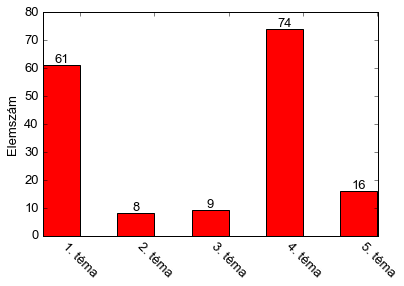

In [139]:
from operator import itemgetter
N = 5
counter=collections.Counter(memberships)
cluster_memberships=[item[1] for item in
                     sorted(counter.items(), key=itemgetter(0))]

counter=collections.Counter(dominant_topics)
topic_memberships=[item[1] for item in
                   sorted(counter.items(), key=itemgetter(0))]

ind = np.arange(N)  # the x locations for the groups
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, topic_memberships, width, color='r')

#womenMeans = dominant_topics
#rects2 = ax.bar(ind + width, topic_memberships, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel(u'Elemszám')
ax.set_xticks(ind + width)
ax.set_xticklabels((u'1. téma', 
                    u'2. téma', 
                    u'3. téma', 
                    u'4. téma', 
                    u'5. téma'),
                  rotation=-45)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

#ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


In [154]:
cluster_topic_crosstab = pd.crosstab(corpus_df["dominant_topics"], corpus_df["cluster_membership"]).as_matrix()
cluster_topic_crosstab

array([[43,  3,  8,  2,  5],
       [ 1,  0,  0,  4,  3],
       [ 0,  0,  3,  3,  3],
       [ 9, 21, 12, 22, 10],
       [ 4,  0,  5,  3,  4]], dtype=int64)